In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("car.csv",names=['buying','maint','doors','person','lug_boot','safety','class'])

In [3]:
dataset['doors'] = pd.to_numeric(dataset.doors.astype(str).str.replace('5more','5'), errors='coerce').fillna(0).astype(int)
dataset['person'] = pd.to_numeric(dataset.person.astype(str).str.replace('more','5'), errors='coerce').fillna(0).astype(int)

In [4]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,4,5])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[2 2 2 ... 2 1 3]


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)  

DecisionTreeClassifier()

In [9]:
y_pred = clf.predict(x_test)

In [10]:
clf.tree_.max_depth

14

In [11]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='micro')

0.9797687861271677

In [12]:
f1_score(y_test,y_pred,average='macro')


0.9574262746808258

In [13]:
f1_score(y_test,y_pred,average='weighted')

0.9800327462149936

In [14]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(y_test,y_pred)

In [15]:
print(a)

[[ 58   0   0   1]
 [  0  14   0   0]
 [  5   0 255   0]
 [  0   1   0  12]]


In [16]:
from sklearn.metrics import precision_score, recall_score
pr = precision_score(y_test,y_pred,average='micro')
re = recall_score(y_test,y_pred,average='micro')

In [17]:
pr,re

(0.9797687861271677, 0.9797687861271677)

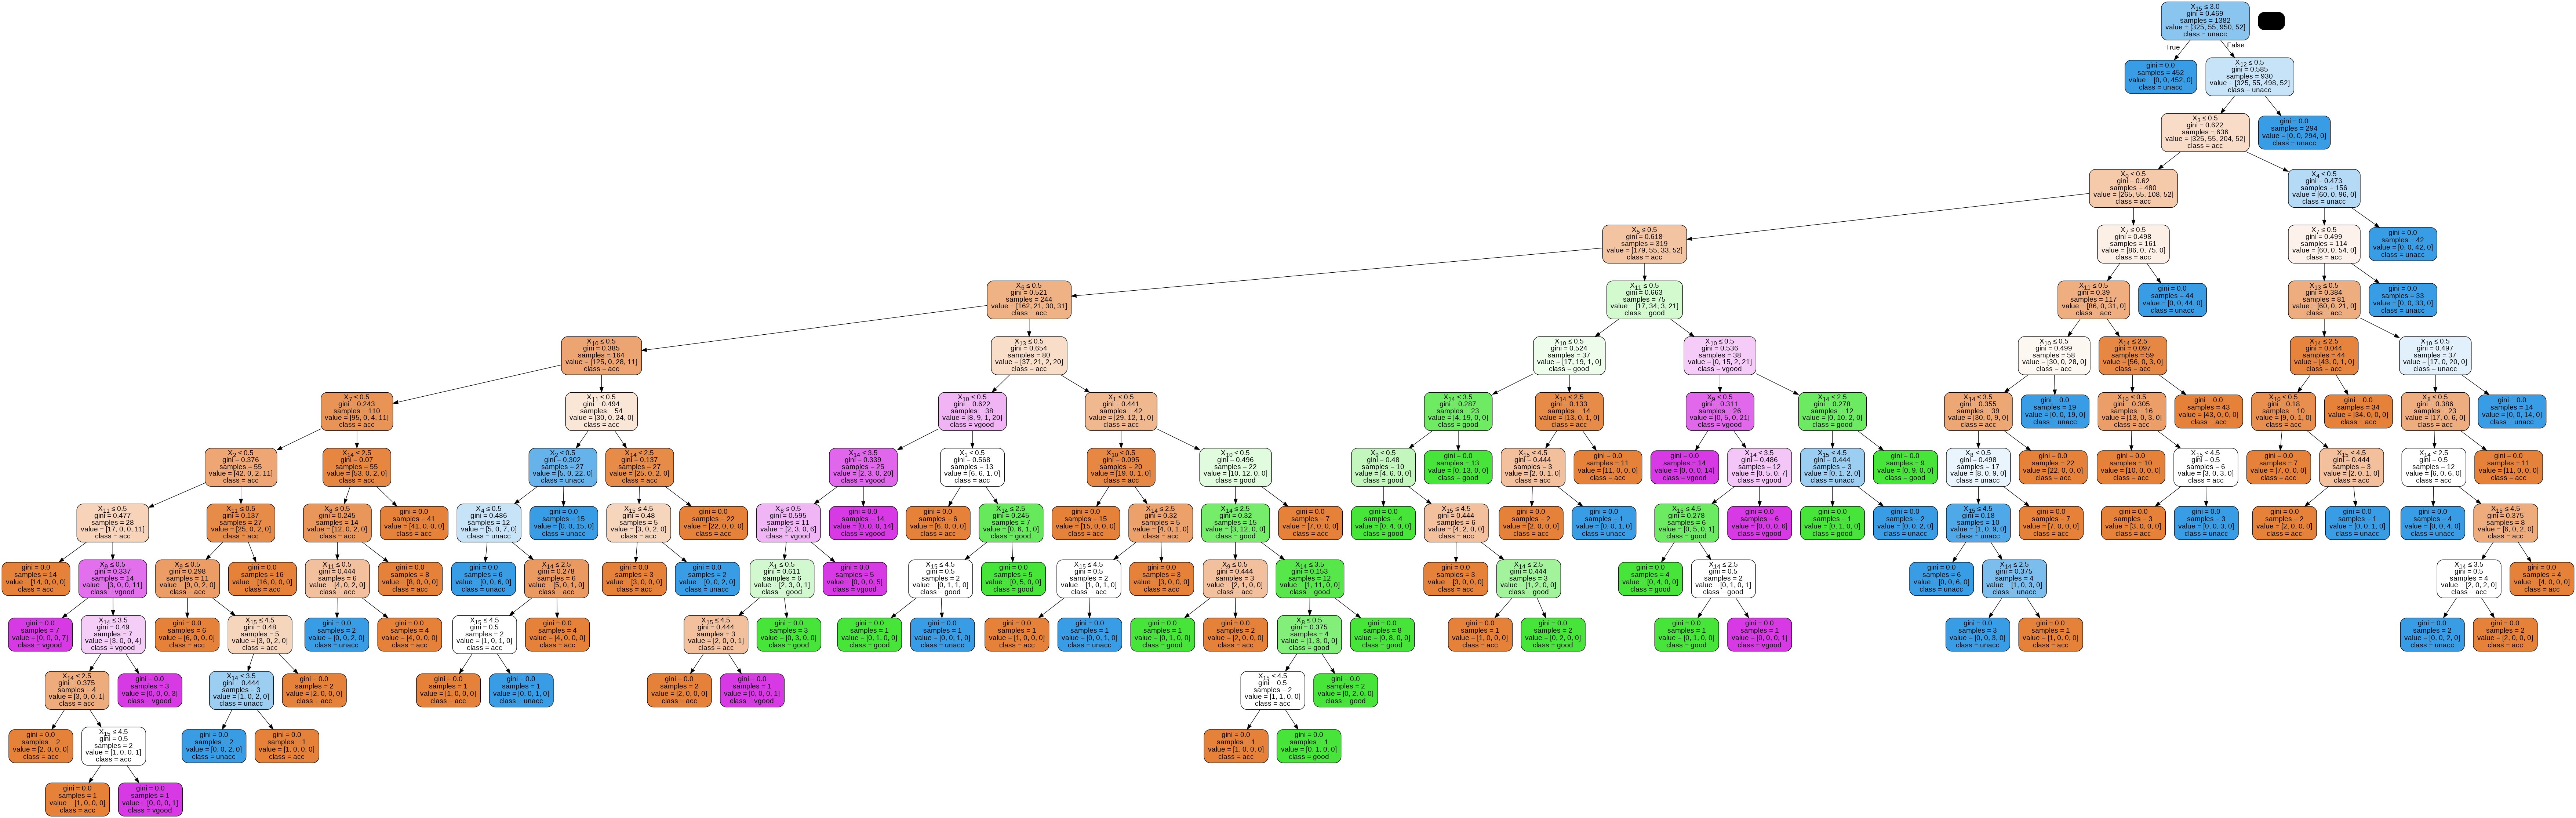

In [18]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True,class_names=['acc','good','unacc','vgood'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())